In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import skimage

In [2]:
def cv_show(name,img):
    cv.imshow(name,img)
    cv.waitKey(0)
    cv.destroyAllWindows()

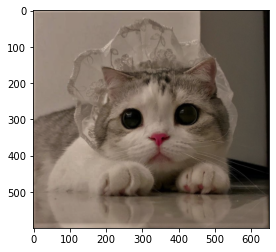

In [3]:
img = cv.imread('puff.png')
img = np.flip(img,2)
plt.imshow(img)

## Basic morphological operations.
### 消除内部点

Text(0.5, 1.0, 'iterations = 4')

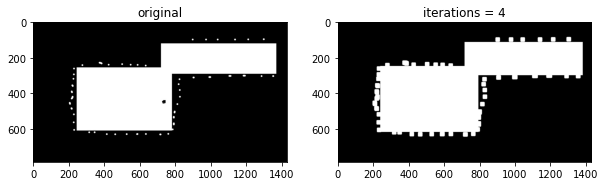

In [9]:
ang2 = cv.imread('dilate.jpg')
kernel = np.ones((5,5),np.uint8)
dst = cv.dilate(ang2,kernel,iterations = 4)

plt.figure(figsize= (10,10))
plt.subplot(121);plt.imshow(ang2);plt.title('original')
plt.subplot(122);plt.imshow(dst);plt.title('iterations = 4')

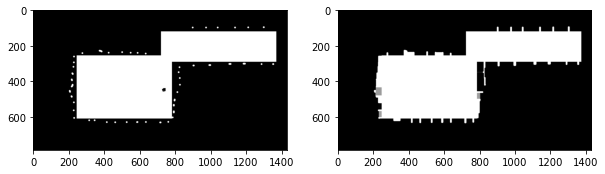

In [12]:
#闭运算 =》 线膨胀再腐蚀
kernel = np.ones((5,5),np.uint8)

dst = cv.morphologyEx(ang2,cv.MORPH_CLOSE,kernel,iterations = 8)

plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(ang2);
plt.subplot(122);plt.imshow(dst)

Text(0.5, 1.0, 'erode:5,dilate:9')

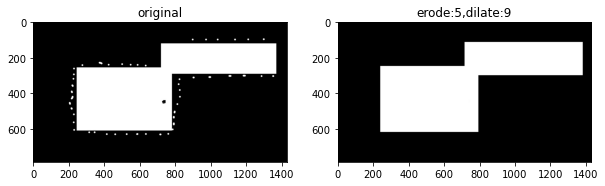

In [35]:
kernel = np.ones((5,5),np.uint8)
dst = cv.erode(ang2,kernel,iterations = 5)
dst = cv.dilate(dst,kernel,iterations = 9)

plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(ang2);plt.title('original')
plt.subplot(122);plt.imshow(dst);plt.title('erode:5,dilate:9')

Text(0.5, 1.0, 'CLOSE')

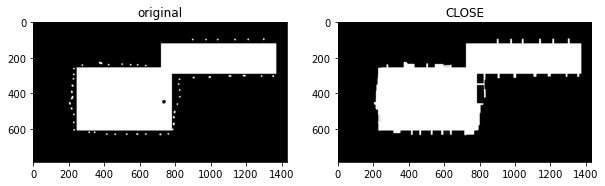

In [36]:
kernel = np.ones((5,5),np.uint8)

dst = cv.morphologyEx(ang2,cv.MORPH_CLOSE,kernel,iterations = 9)

plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(ang2);plt.title('original')
plt.subplot(122);plt.imshow(dst);plt.title('CLOSE')

### 图像分割
Object spliting

Text(0.5, 1.0, 'Object Spliting')

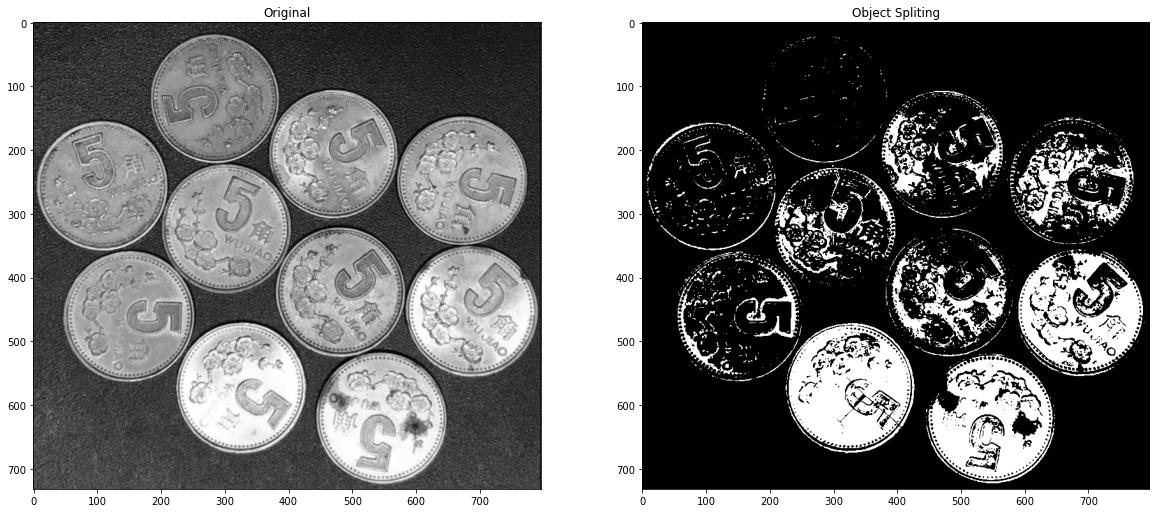

In [6]:
I = cv.imread ("coin.jpg" ,cv.IMREAD_GRAYSCALE )
ret,Inew = cv.threshold (I , 180 , 255 ,cv . THRESH_BINARY )
# Inew = cv.adaptiveThreshold(I,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,15,2)

B = cv.getStructuringElement (cv.MORPH_ELLIPSE , (3,3))

# Erosion
BW2 = cv.morphologyEx(Inew ,cv.MORPH_ERODE , B , 
                      iterations = 20 ,
                      borderType = cv.BORDER_CONSTANT ,
                      borderValue = (0))
T = np.zeros_like(Inew)
# Dilation
while cv.countNonZero ( BW2 ) < BW2 . size :
    D = cv . dilate ( BW2 , B ,borderType = cv.BORDER_CONSTANT ,borderValue = (0))
    C = cv . morphologyEx (D , cv.MORPH_CLOSE , B ,borderType = cv.BORDER_CONSTANT ,borderValue = (0))
    S = C - D
    T = cv.bitwise_or (S , T )
    BW2 = D.copy()
# Closing for borders
T = cv.morphologyEx (T , cv.MORPH_CLOSE , B ,
                        iterations = 20 ,
                        borderType = cv.BORDER_CONSTANT ,
                        borderValue = (255))
# Remove borders from an image
Inew = cv.bitwise_and (~ T , Inew )

plt.figure(figsize=(20,20))
plt.subplot(121);plt.imshow(I,cmap='gray');plt.title('Original')
plt.subplot(122);plt.imshow(Inew,cmap='gray');plt.title('Object Spliting')

### Watershed Segmentation

In [7]:
def bwareaopen (A , dim , conn = 8):
    if A . ndim > 2:
        return None
    # Find all connected components
    num , labels , stats , centers = cv.connectedComponentsWithStats (A ,connectivity = conn )
    # Check size of all connected components
    for i in range ( num ):
        if stats [i , cv.CC_STAT_AREA ] < dim :
            A [ labels == i ] = 0
            return A

In [8]:
# Read an image
# Convert to grayscale and to BW
# Filter
I = cv.imread ( "fruit.jpg" , cv.IMREAD_COLOR )
I_gray = cv . cvtColor (I , cv.COLOR_BGR2GRAY )
ret , I_bw = cv.threshold ( I_gray , 0 , 255 ,cv.THRESH_BINARY + cv.THRESH_OTSU )
I_bw = bwareaopen ( I_bw , 20 , 4)
B = cv.getStructuringElement ( cv.MORPH_ELLIPSE , (5 , 5))
I_bw = cv.morphologyEx ( I_bw , cv.MORPH_CLOSE , B )

# Do distance transformation
# Find foreground location
# Define foreground markers
I_fg = cv.distanceTransform ( I_bw ,cv.DIST_L2 , 5)
ret , I_fg = cv.threshold ( I_fg ,0.6 * I_fg . max () , 255 , 0)
ret , markers = cv.connectedComponents ( I_fg )

# Find background location
I_bg = np . zeros_like ( I_bw )
markers_bg = markers . copy ()
markers_bg = cv.watershed (I , markers_bg )
I_bg [ markers_bg == -1] = 255

# Define undefined area
I_unk = cv.subtract (~ I_bg , I_fg )

# Define all markers
markers = markers + 1
markers [ I_unk == 255] = 0

# Do watershed
# Prepare for visualization
markers = cv.watershed (I , markers )
markers_jet = cv.applyColorMap (( markers . astype ( np . float32 ) * 255 /( ret + 1)). astype ( np . uint8 ) ,
                                   cv.COLORMAP_JET )
I [ markers == -1] = (0 , 0 , 255)

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\connectedcomponents.cpp:4315: error: (-215:Assertion failed) iDepth == CV_8U || iDepth == CV_8S in function 'cv::connectedComponents_sub1'


# 网上抄来的分水岭算法

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
src = cv2.imread('pegion.jpg')
src = np.flip(src,2)
img = src.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=(20,20))
plt.subplot(121);plt.imshow(src);plt.title('Original')
plt.subplot(122);plt.imshow(thresh);plt.title('Threshold')

In [ ]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 膨胀
sure_bg = cv2.dilate(opening, kernel, iterations=3)
 
# 距离变换
dist_transform = cv2.distanceTransform(opening, 1, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

plt.figure(figsize=(15,15))
plt.subplot(121);plt.imshow(sure_bg);plt.title('Dilate')
plt.subplot(122);plt.imshow(dist_transform);plt.title('Dist Transform')
plt.show()
plt.figure(figsize=(15,15))
plt.subplot(121);plt.imshow(sure_fg);plt.title('Threshold')

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.subplot(122);plt.imshow(unknown);plt.title('Unknown')

In [ ]:
# 标记
ret, markers1 = cv2.connectedComponents(sure_fg)
 
# 确保背景是1不是0
markers = markers1 + 1
 
# 未知区域标记为0
markers[unknown == 255] = 0
plt.imshow(markers);plt.title('Unknown')

In [ ]:
markers3 = cv2.watershed(img, markers)
img[markers3 == -1] = [0, 0, 255]

plt.imshow(img);plt.title('Unknown')

## 全部代码

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
src = cv2.imread('pocker.jpg')
img = src.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,17,2)
 
# 消除噪声
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)
 
# 膨胀
sure_bg = cv2.dilate(opening, kernel, iterations=3)
 
# 距离变换
dist_transform = cv2.distanceTransform(opening, 1, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
 
# 获得未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
 
# 标记
ret, markers1 = cv2.connectedComponents(sure_fg)
 
# 确保背景是1不是0
markers = markers1 + 1
 
# 未知区域标记为0
markers[unknown == 255] = 0
 
markers3 = cv2.watershed(img, markers)
img[markers3 == -1] = [0, 0, 255]

plt.figure(figsize=(15,80))
plt.subplot(821), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),
plt.title('Original'), plt.axis('off')
plt.subplot(822), plt.imshow(thresh, cmap='gray'),
plt.title('Threshold'), plt.axis('off')
plt.subplot(823), plt.imshow(sure_bg, cmap='gray'),
plt.title('Dilate'), plt.axis('off')
plt.subplot(824), plt.imshow(dist_transform, cmap='gray'),
plt.title('Dist Transform'), plt.axis('off')
plt.subplot(825), plt.imshow(sure_fg, cmap='gray'),
plt.title('Threshold'), plt.axis('off')
plt.subplot(826), plt.imshow(unknown, cmap='gray'),
plt.title('Unknow'), plt.axis('off')
plt.subplot(827), plt.imshow(np.abs(markers), cmap='jet'),
plt.title('Markers'), plt.axis('off')
plt.subplot(828), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),
plt.title('Result'), plt.axis('off')
 
plt.show()